In [155]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns

from scipy.stats import poisson
from scipy.stats import norm

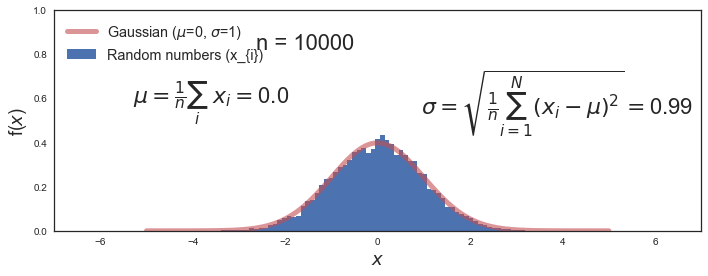

In [233]:
nEvents = 10000
Bins = np.linspace(-5.0, 5.0, 100)

toys = np.random.normal(size=nEvents)

df = pd.DataFrame(toys, columns=['events'])
dataCounts, dataBins = np.histogram(df, bins=Bins, density=True)
binCentres = (dataBins[:-1] + dataBins[1:]) / 2
width = np.diff(dataBins)

#plt.figure()
fig, ax = plt.subplots(figsize=(10, 4), tight_layout=True)


ax = plt.gca()
labely = ax.set_xlabel("$x$", fontsize = 18)
labely = ax.set_ylabel("f($x$)", fontsize = 18)

x = np.linspace(-5.0, 5.0, 100)
ax.plot(x, norm.pdf(x, 0, 1.0), 'r-', lw=5, alpha=0.6, label=r'Gaussian ($\mu$=0, $\sigma$=1)')
plt.bar(binCentres, dataCounts, align='center', width=width, label='Random numbers (x_{i})', color='b')

plt.xlim(-7, 7)
plt.ylim(0, 1)


legend = ax.legend(loc='upper left', fontsize='large', ncol=1)

mean =  np.mean(df["events"])
sigma =  np.std(df["events"])


pltText0 = r"n = " + str(nEvents)

plt.text(pos*1.6, 0.85, pltText0,  {'fontsize': 22},
         horizontalalignment='right',
         verticalalignment='center',
         transform=plt.gca().transAxes)


pltText1 = r"$ \mu = \frac{1}{n} \sum_{i}\; x_{i} = $" + str(round(mean, 2))

plt.text(pos*1.25, 0.58, pltText1,  {'fontsize': 22},
         horizontalalignment='right',
         verticalalignment='center',
         transform=plt.gca().transAxes)

pltText2 = r"$\sigma = {\sqrt {{\frac {1}{n}}\sum _{i=1}^{N}(x_{i}-\mu )^{2}}} = $" + str(round(sigma, 2))

plt.text(pos*3.4, 0.58, pltText2,  {'fontsize': 22},
         horizontalalignment='right',
         verticalalignment='center',
         transform=plt.gca().transAxes)

plt.show() 
plt.close()

44.313306977324


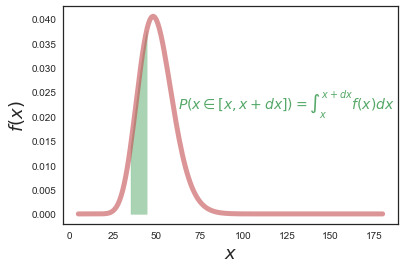

In [130]:
fig, ax = plt.subplots()
x = np.linspace(5.0, 180.0, 200)

ax.plot(x, stats.chi2.pdf(x, 50), 'r-', lw=5, alpha=0.6, label="pdf")

ax.set_xlabel("$x$", fontsize = 18)
ax.set_ylabel("$f(x)$", fontsize = 18)
#legend = ax.legend(loc='upper right', fontsize='large')
alpha = 0.3

x_alpha = stats.chi2.ppf(alpha, 50)
infty = stats.chi2.ppf(0.9999, 50)

px=np.arange(35,x_alpha,0.001)

print(x_alpha)
ax.fill_between(px,stats.chi2.pdf(px,50),alpha=0.5, color='g')

left, right = plt.xlim()
bottom, top = plt.ylim()

ax.text(right*0.33, top*0.5,"$P(x \in [x, x + dx]) = \int^{x + dx}_{x} f(x) dx$", color='g', fontsize=14)

#pltText = r"green area = $\alpha$ = " + str(alpha)
#plt.text(0.55, 0.8,  pltText, {'color': 'C2', 'fontsize': 13},
#         horizontalalignment='left',
#         verticalalignment='center',
#         transform=plt.gca().transAxes)

#pos = (x_alpha*1.1)/right
#pltText = r"$x = x_{" + str(alpha) + "}$"

#plt.text(pos, 0.1, pltText,  {'fontsize': 14},
#         horizontalalignment='left',
#         verticalalignment='center',
#         transform=plt.gca().transAxes)

#plt.vlines(x_alpha, 0.0, 0.02,  linestyle="dashed")
plt.show()

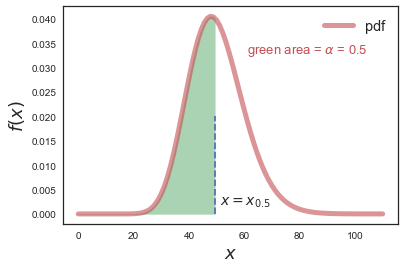

In [97]:
fig, ax = plt.subplots()
x = np.linspace(0.0, 110.0, 100)

ax.plot(x, stats.chi2.pdf(x, 50), 'r-', lw=5, alpha=0.6, label="pdf")
#ax.plot(x, stats.uniform.pdf(x, 20.0, 40.0), 'r-', lw=5, alpha=0.6)

ax.set_xlabel("$x$", fontsize = 18)
ax.set_ylabel("$f(x)$", fontsize = 18)
legend = ax.legend(loc='upper right', fontsize='large')
alpha = 0.5

x_alpha = stats.chi2.ppf(alpha, 50)
infty = stats.chi2.ppf(0.9999, 50)
#x_alpha = stats.uniform.ppf(alpha, 20.0, 40.0)
#infty = stats.chi2.ppf(0.9999, df)

px=np.arange(0,x_alpha,0.001)
ax.fill_between(px,stats.chi2.pdf(px,50),alpha=0.5, color='g')
#ax.fill_between(px,stats.uniform.pdf(px, 20.0, 40.0),alpha=0.5, color='g')

left, right = plt.xlim()
bottom, top = plt.ylim()

#ax.text(right*0.6, top*0.5,"$P(A) = \int^{x + dx}_{x - dx} f(x) dx$", color='g', fontsize=14)

pltText = r"green area = $\alpha$ = " + str(alpha)
plt.text(0.55, 0.8,  pltText, {'color': 'C2', 'fontsize': 13},
         horizontalalignment='left',
         verticalalignment='center',
         transform=plt.gca().transAxes)

pos = (x_alpha*1.1)/right
pltText = r"$x = x_{" + str(alpha) + "}$"

plt.text(pos, 0.1, pltText,  {'fontsize': 14},
         horizontalalignment='left',
         verticalalignment='center',
         transform=plt.gca().transAxes)

plt.vlines(x_alpha, 0.0, 0.02,  linestyle="dashed")
plt.show()


In [78]:
from random import seed
from random import gauss
from random import uniform
import matplotlib.pyplot as plt

import numpy as np

Sum = 0.9880954961436428


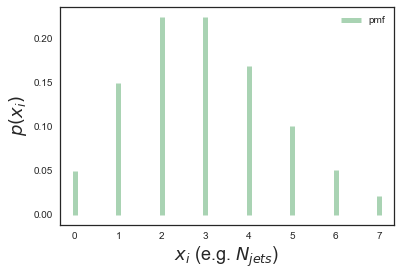

In [79]:
fig, ax = plt.subplots(1, 1)

mu = 3
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')

x = np.arange(poisson.ppf(0.01, mu),
              poisson.ppf(0.99, mu))
#ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, mu), label="pmf", colors='g', lw=5, alpha=0.5)

plt.legend()

labelx = ax.set_xlabel("$x_i$ (e.g. $N_{jets}$)", fontsize = 18)
labely = ax.set_ylabel("$p(x_i)$", fontsize = 18)
sum = np.sum(poisson.pmf(x, mu))

print("Sum = " + str(sum) )

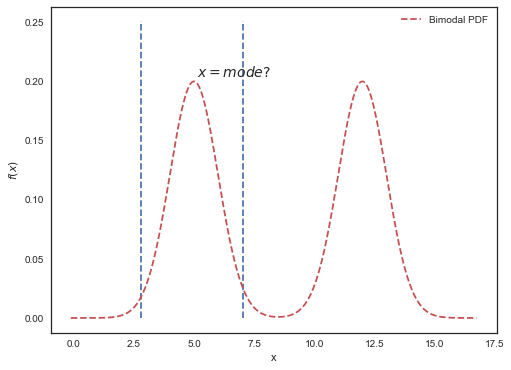

In [80]:
#bimodal pdf
loc1, scale1, size1 = (5, 1.0, 10000)
loc2, scale2, size2 = (12, 1.0, 10000)
x2 = np.concatenate([np.random.normal(loc=loc1, scale=scale1, size=size1), np.random.normal(loc=loc2, scale=scale2, size=size2)])

x_eval = np.linspace(x2.min() - 1, x2.max() + 1, 5000)
pdf = stats.norm.pdf
bimodal_pdf = pdf(x_eval, loc=loc1, scale=scale1) * float(size1) / x2.size +pdf(x_eval, loc=loc2, scale=scale2) * float(size2) / x2.size

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

#x_eval = np.linspace(0, 10, 500)
#ax.plot(x_eval, stats.chi2.pdf(x_eval, 2), 'r--', label="$\chi^{2}, ndof=2$")
ax.plot(x_eval, bimodal_pdf, 'r--', label="Bimodal PDF")

px=np.arange(0,stats.chi2.ppf(0.5, 2),0.00001)
#ax.fill_between(px,0.5*pdf(px, loc=loc1, scale=scale1),alpha=0.5, color='g')
#ax.fill_between(px,stats.chi2.pdf(px,2),alpha=0.5, color='g')

ax.legend(loc=1)
ax.set_xlabel('x')
ax.set_ylabel('$f(x)$')

#pltText = r"$x = x_{" + str(alpha) + "}$"

pltText = r"$x = mode?$"

plt.text(pos*1.05, 0.8, pltText,  {'fontsize': 14},
         horizontalalignment='right',
         verticalalignment='center',
         transform=plt.gca().transAxes)

#plt.vlines(stats.chi2.ppf(0.5,2), 0.0, stats.chi2.pdf(stats.chi2.ppf(0.5,2),2),  linestyle="dashed")
#plt.vlines(2.8, 0.0, stats.chi2.pdf(stats.chi2.ppf(0.5,2),2),  linestyle="dashed")
#plt.vlines(7.1, 0.0, stats.chi2.pdf(stats.chi2.ppf(0.5,2),2),  linestyle="dashed")

plt.vlines(2.8, 0.0, 0.25,  linestyle="dashed")
plt.vlines(7.03, 0.0, 0.25,  linestyle="dashed")

plt.show()

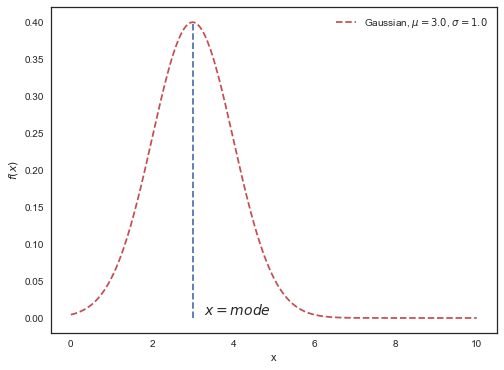

In [81]:
x_eval = np.linspace(x2.min() - 1, x2.max() + 1, 500)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

x_eval = np.linspace(0, 10, 500)
#ax.plot(x_eval, stats.chi2.pdf(x_eval, 2), 'r--', label="$\chi^{2}, ndof=2$")
ax.plot(x_eval, stats.norm.pdf(x_eval, 3.0, 1.0), 'r--', label="Gaussian, $\mu =3.0$, $\sigma =1.0$")

alpha=0.000001

px=np.arange(0,stats.chi2.ppf(alpha, 2),0.001)

ax.legend(loc=1)
ax.set_xlabel('x')
ax.set_ylabel('$f(x)$')

pltText = r"$x = mode$"

plt.text(pos*1.05, 0.07, pltText,  {'fontsize': 14},
         horizontalalignment='right',
         verticalalignment='center',
         transform=plt.gca().transAxes)

#plt.vlines(stats.chi2.ppf(0.001,2), 0.0, stats.chi2.pdf(stats.chi2.ppf(0.001,2),2),  linestyle="dashed")
plt.vlines(3.0, 0.0, 0.4,  linestyle="dashed")

plt.show()

No handles with labels found to put in legend.


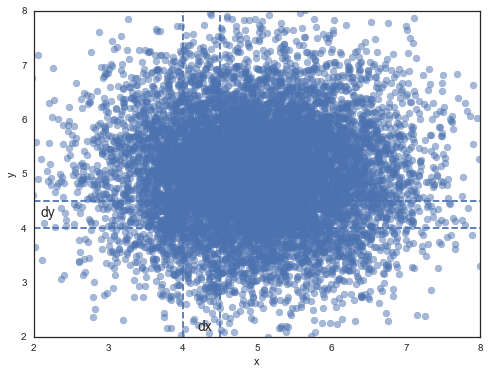

In [82]:
#joint pdf demo
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

# Fixing random state for reproducibility
np.random.seed(19680801)

N = 10000

x = np.random.normal(loc=loc1, scale=scale1, size=N)
y = np.random.normal(loc=loc1, scale=scale1, size=N)

#colors = np.random.rand(N)
#area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, alpha=0.5)
ax.legend(loc=1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim([2.0,8.0])
ax.set_ylim([2.0,8.0])

plt.vlines(4.0, 2.0, 8.0,  linestyle="dashed")
plt.vlines(4.5, 2.0, 8.0,  linestyle="dashed")

plt.hlines(4.0, 2.0, 8.0,  linestyle="dashed")
plt.hlines(4.5, 2.0, 8.0,  linestyle="dashed")

plt.text(pos*0.85, 0.03, "dx",  {'fontsize': 14},
         horizontalalignment='right',
         verticalalignment='center',
         transform=plt.gca().transAxes)

plt.text(pos*0.1, 0.38, "dy",  {'fontsize': 14},
         horizontalalignment='right',
         verticalalignment='center',
         transform=plt.gca().transAxes)

plt.show()


In [83]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.datasets.samples_generator import make_blobs
n_components = 1
centers = [(5.0,5.0)]
X, truth = make_blobs(n_samples=N, centers=centers, cluster_std=[(1.0,1.0)],random_state=42)

plt.scatter(X[:, 0], X[:, 1], s=50,alpha=0.5)
plt.xlabel("x")
plt.ylabel("y")

# Extract x and y
x = X[:, 0]
y = X[:, 1]
# Define the borders
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
#xmin = min(x) - deltaX
#xmax = max(x) + deltaX
#ymin = min(y) - deltaY
#ymax = max(y) + deltaY

xmin = 0.0
xmax = 10.0
ymin = 0.0
ymax = 10.0

# Create 2-D matrix of points (meshgrid) on which to draw joint pdf
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

# make 1-2 vector of the postions in the meshgrid
positions = np.vstack([xx.ravel(), yy.ravel()])

# make 2xN matrix of the values of the gauusian blobs
values = np.vstack([x, y])

# extract gaussian function from the values
kernel = st.gaussian_kde(values)

# calculate values of the function at the por-defined positions
f = np.reshape(kernel(positions).T, xx.shape)

print(f.shape)

#plot 
fig = plt.figure(figsize=(6,6))
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
levels = [0.001, 0.003, 0.005, 0.01]
cset = ax.contour(xx, yy, f, levels=levels, colors='k')
cfset = ax.contourf(xx, yy, f, levels=levels, cmap='coolwarm')

#ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax])
fig.colorbar(cfset, ax=ax, shrink=0.9)

#cset = ax.contour(xx, yy, f, colors='k')
ax.clabel(cfset, inline=1, fontsize=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

ModuleNotFoundError: No module named 'sklearn.datasets.samples_generator'

In [ ]:
#marginal pdfs
sns.set(style="white", color_codes=True)

g = sns.jointplot(x, y)
g.set_axis_labels("x", "y")

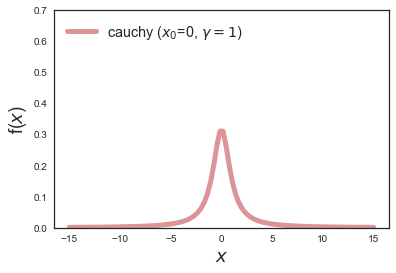

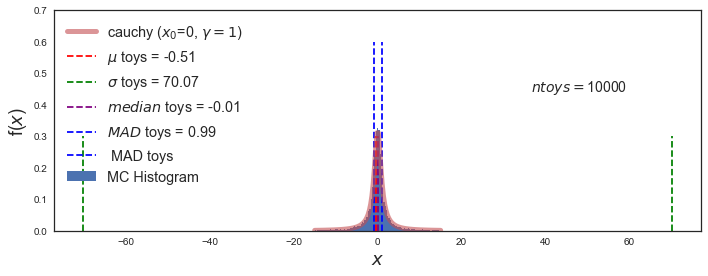

-0.5114548868418228
70.07147098042853
0.9912540937774561


In [267]:
from scipy.stats import cauchy
from scipy.stats import median_abs_deviation

nEvents = 10000
Bins = np.linspace(-15.0, 15.0, 100)

toys = np.random.standard_cauchy(size=nEvents)

df = pd.DataFrame(toys, columns=['events'])
dataCounts, dataBins = np.histogram(df, bins=Bins, density=True)
binCentres = (dataBins[:-1] + dataBins[1:]) / 2
width = np.diff(dataBins)

plt.figure()
ax = plt.gca()
labely = ax.set_xlabel("$x$", fontsize = 18)
labely = ax.set_ylabel("f($x$)", fontsize = 18)

x = np.linspace(-15.0, 15.0, 100)
ax.plot(x, stats.cauchy.pdf(x, 0, 1.0), 'r-', lw=5, alpha=0.6, label=r'cauchy ($x_0$=0, $\gamma=1$)')

plt.ylim(0, 0.7)

legend = ax.legend(loc='upper left', fontsize='large', ncol=2)

plt.show() 
plt.close()


fig, ax = plt.subplots(figsize=(10, 4), tight_layout=True)
ax = plt.gca()
labely = ax.set_xlabel("$x$", fontsize = 18)
labely = ax.set_ylabel("f($x$)", fontsize = 18)

x = np.linspace(-15.0, 15.0, 100)
ax.plot(x, stats.cauchy.pdf(x, 0, 1.0), 'r-', lw=5, alpha=0.6, label=r'cauchy ($x_0$=0, $\gamma=1$)')
plt.bar(binCentres, dataCounts, align='center', width=width, label='MC Histogram', color='b')

mean_label= r"$\mu$ toys = " + str(round(np.mean(toys), 2))
sigma_label= r"$\sigma$ toys = " + str(round(np.std(toys), 2))
median_label= r"$median$ toys = " + str(round(np.median(toys), 2))
mad_label= r"$MAD$ toys = " + str(round(median_abs_deviation(toys), 2))


plt.vlines(np.mean(toys), 0.0, 0.3,  linestyle="dashed", color="red", label=mean_label)
plt.vlines(-np.std(toys), 0.0, 0.3,  linestyle="dashed", color="green", label=sigma_label )
plt.vlines(np.std(toys), 0.0, 0.3,  linestyle="dashed", color="green" )
plt.vlines(np.median(toys), 0.0, 0.3,  linestyle="dashed", color="purple" , label=median_label)
plt.vlines(-median_abs_deviation(toys), 0.0, 0.6,  linestyle="dashed", color="blue", label=mad_label)
plt.vlines(median_abs_deviation(toys), 0.0, 0.6,  linestyle="dashed", color="blue" , label=" MAD toys" )

plt.ylim(0, 0.7)

legend = ax.legend(loc='upper left', fontsize='large', ncol=1)

pltText = r"$n toys = $" + str(nEvents)

plt.text(pos*3.05, 0.65, pltText,  {'fontsize': 14},
         horizontalalignment='right',
         verticalalignment='center',
         transform=plt.gca().transAxes)

plt.show() 
plt.close()

print(np.mean(toys))
print(np.std(toys))

print(median_abs_deviation(toys))